## My Style

### Plot Bisection Results from CSV

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def plot_xy(directory, csv_name, x_branch, y_branch, title, x_label, y_label, x_log, y_log):

    csv_file = os.path.join(directory, csv_name)
    df = pd.read_csv(csv_file)

    x = df[x_branch][80:400]
    y = df[y_branch][80:400]

    SIZE_DEFAULT = 14
    SIZE_LARGE = 20

    plt.rc("font", family = 'Century Expanded')  
    plt.rc("font", weight = "normal")  
    plt.rc("font",  size      = SIZE_DEFAULT)  
    plt.rc("axes",  titlesize = SIZE_LARGE + 2)  
    plt.rc("axes",  labelsize = SIZE_LARGE)  
    plt.rc("xtick", labelsize = SIZE_DEFAULT)  
    plt.rc("ytick", labelsize = SIZE_DEFAULT)  

    plt.figure(figsize = (10, 6))
    plt.tight_layout(rect = [0, 0.01, 1, 1])

    plt.plot(x, y, marker = 'o')
    plt.grid(True, alpha = 0.5)
    
    plt.xlabel(x_label, fontweight = "bold", labelpad = 21)
    plt.ylabel(y_label, fontweight = "bold", labelpad = 22)
    plt.title (title  , fontweight = "bold", pad = 25)
    
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)
    ax.spines['top'].set_alpha(0.3)
    ax.spines['right'].set_alpha(0.3)
    ax.spines['bottom'].set_alpha(0.7)
    ax.spines['left'].set_alpha(0.7)

    if x_log == True: plt.xscale('log')
    if y_log == True: plt.yscale('log')

    plt.savefig(title + '.png', dpi = 10)
    plt.show()

    print('Plot saved as', title + '.png')

In [ ]:
directory = 'build/root/'
csv_name = 'Skin.csv'

x_branch = "Energy"
# y_branch = 'Optimal_Thickness'
y_branch = 'AtCoefficient'

title = "skin"
x_label = r"x axis ($keV$)"
y_label = r"y axis"

x_log = False
y_log = False

plot_xy(directory, csv_name, x_branch, y_branch, title, x_label, y_label, x_log, y_log)

### Plot Results vs NIST Real Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def plot_xy(directory, csv_1, x_branch_1, y_branch_1, csv_2, x_branch_2, y_branch_2, title, x_label, y_label, x_log, y_log):

    path_1 = os.path.join(directory, csv_1)
    path_2 = os.path.join(directory, csv_2)
    df_1 = pd.read_csv(path_1)
    df_2 = pd.read_csv(path_2)

    x1 = df_1[x_branch_1]
    y1 = df_1[y_branch_1]

    x2 = df_2[x_branch_2]
    y2 = df_2[y_branch_2]

    SIZE_DEFAULT = 14
    SIZE_LARGE = 20

    plt.rc("font", family = 'Century Expanded')  
    plt.rc("font", weight = "normal")  
    plt.rc("font",  size      = SIZE_DEFAULT)  
    plt.rc("axes",  titlesize = SIZE_LARGE + 2)  
    plt.rc("axes",  labelsize = SIZE_LARGE)  
    plt.rc("xtick", labelsize = SIZE_DEFAULT)  
    plt.rc("ytick", labelsize = SIZE_DEFAULT)  

    plt.figure(figsize = (10, 6))
    plt.tight_layout(rect = [0, 0.01, 1, 1])

    plt.plot(x1, y1, marker = 'o', markersize = 1)
    plt.plot(x2, y2, marker = 'o', markersize = 1)
    plt.grid(True, alpha = 0.5)

    if x_log == True: plt.xscale('log')
    if y_log == True: plt.yscale('log')   
    
    plt.xlabel(x_label, fontweight = "bold", labelpad = 21)
    plt.ylabel(y_label, fontweight = "bold", labelpad = 22)
    plt.title (title  , fontweight = "bold", pad = 25)
    
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)
    ax.spines['top'].set_alpha(0.3)
    ax.spines['right'].set_alpha(0.3)
    ax.spines['bottom'].set_alpha(0.7)
    ax.spines['left'].set_alpha(0.7)

    plt.savefig(title + '.png', dpi = 400)
    plt.show()

    print('Plot saved as', title + '.png')

In [ ]:
directory = 'BUILD/ROOT/'

csv_1 = 'Silicio.csv'
x_branch_1 = "Energy"
y_branch_1 = 'AtCoefficient'

csv_2 = 'RealSi.csv'
x_branch_2 = "Energy"
y_branch_2 = 'Coeff'

title = "Vanadio"
x_label = r"Energy ($KeV$)"
y_label = r"Thicckness ($mm$)"

x_log = True
y_log = True

plot_xy(directory, csv_1, x_branch_1, y_branch_1, csv_2, x_branch_2, y_branch_2, title, x_label, y_label, x_log, y_log)

### Plot 3 in 1 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.interpolate import interp1d
import numpy as np

def Plot_3in1(directory, csv_1, csv_2, x_branch_1, y_branch_1, title, x_label, y_label, save_as):

    path_1 = os.path.join(directory, csv_1)
    path_2 = os.path.join(directory, csv_2)
    
    df_1 = pd.read_csv(path_1)
    df_2 = pd.read_csv(path_2)
    df_2.columns = df_2.columns.str.strip()

    x1 = df_1[x_branch_1]

    y11 = df_1['Muscle']
    y12 = df_1['Fat']
    y13 = df_1['Skin']

    x2 = df_2['Energy']

    y21 = df_2['Muscle']
    y22 = df_2['Adipose']
    y23 = df_2['Skin']

    interp_muscle   = interp1d(x2, y21, kind='cubic', fill_value="extrapolate")
    interp_adipose  = interp1d(x2, y22, kind='cubic', fill_value="extrapolate")
    interp_skin     = interp1d(x2, y23, kind='cubic', fill_value="extrapolate")

    y21_interp = interp_muscle(x1)
    y22_interp = interp_adipose(x1)
    y23_interp = interp_skin(x1)

    error_muscle    = np.abs((y11 - y21_interp) / y21_interp) * 100
    error_adipose   = np.abs((y12 - y22_interp) / y22_interp) * 100
    error_skin      = np.abs((y13 - y23_interp) / y23_interp) * 100

    error_muscle = error_muscle.mean()
    error_adipose = error_adipose.mean()
    error_skin = error_skin.mean()
    
    SIZE_DEFAULT = 12
    SIZE_LARGE = 17

    plt.rc("font",  family = 'Century Expanded')  
    plt.rc("font",  weight = "normal")  
    plt.rc("axes",  titlesize = SIZE_LARGE)  
    plt.rc("font",  size      = 13)  
    plt.rc("axes",  labelsize = SIZE_DEFAULT)  
    plt.rc("xtick", labelsize = SIZE_DEFAULT)  
    plt.rc("ytick", labelsize = SIZE_DEFAULT)  

    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

    ax1.grid(True, which='both', linestyle='--', linewidth=0.7)
    ax1.plot(x2, y21, marker='o', markersize=3, label='Experimental data ($\\rho = 1.05$)', color='red', alpha=0.6)
    ax1.plot(x1, y11, marker='o', markersize=1, label='Simulated ($\\rho = 1.05$)', color='blue', alpha=0.8)
    ax1.set_ylabel('', fontsize=16)
    ax1.legend(loc='upper right')
    fig.text(0.68, 0.87, f'Global Percentage Error: {error_muscle:.2f}%', fontsize=14, fontweight='bold', bbox=dict(facecolor='white', alpha=0.5))
    ax1.set_title('Skeletal Muscle', fontsize=SIZE_LARGE)

    ax2.grid(True, which='both', linestyle='--', linewidth=0.7)
    ax2.plot(x1, y12, marker='o', markersize=1, label='Simulated ($\\rho = 0.95$)', color='blue', alpha=0.8)
    ax2.plot(x2, y22, marker='x', markersize=3, label='Experimental data ($\\rho = 0.95$)', color='green', alpha=0.6)
    # ax2.plot(x1, y22_interp, marker='o', markersize=3, label='Experimental data ($\\rho = 0.95$)', color='red', alpha=0.6)
    ax2.set_ylabel(y_label, fontsize=16, labelpad = 18)
    ax2.legend(loc = 'upper right')
    fig.text(0.68, 0.565, f'Global Percentage Error: {error_adipose:.2f}%', fontsize=14, fontweight='bold', bbox=dict(facecolor='white', alpha=0.5))
    ax2.set_title('Adipose Tissue', fontsize=SIZE_LARGE)

    ax3.grid(True, which='both', linestyle='--', linewidth=0.7)
    ax3.plot(x1, y13, marker='o', markersize=1, label='Simulated ($\\rho = 1.09$)', color='blue', alpha=0.8)
    ax3.plot(x2, y23, marker='x', markersize=3, label='Experimental data ($\\rho = 1.09$)', color='black', alpha=0.6)
    ax3.set_ylabel('', fontsize=16)
    ax3.set_title('Skin', fontsize=SIZE_LARGE)
    ax3.set_xlabel(x_label, fontsize=16, labelpad = 18)
    ax3.legend(loc='upper right')
    fig.text(0.68, 0.255, f'Global Percentage Error: {error_skin:.2f}%', fontsize=14, fontweight='bold', bbox=dict(facecolor='white', alpha=0.5))

    plt.tight_layout(rect=[0, 0, 1, 1])
    plt.savefig(save_as + '.png', dpi = 600)
    plt.show()

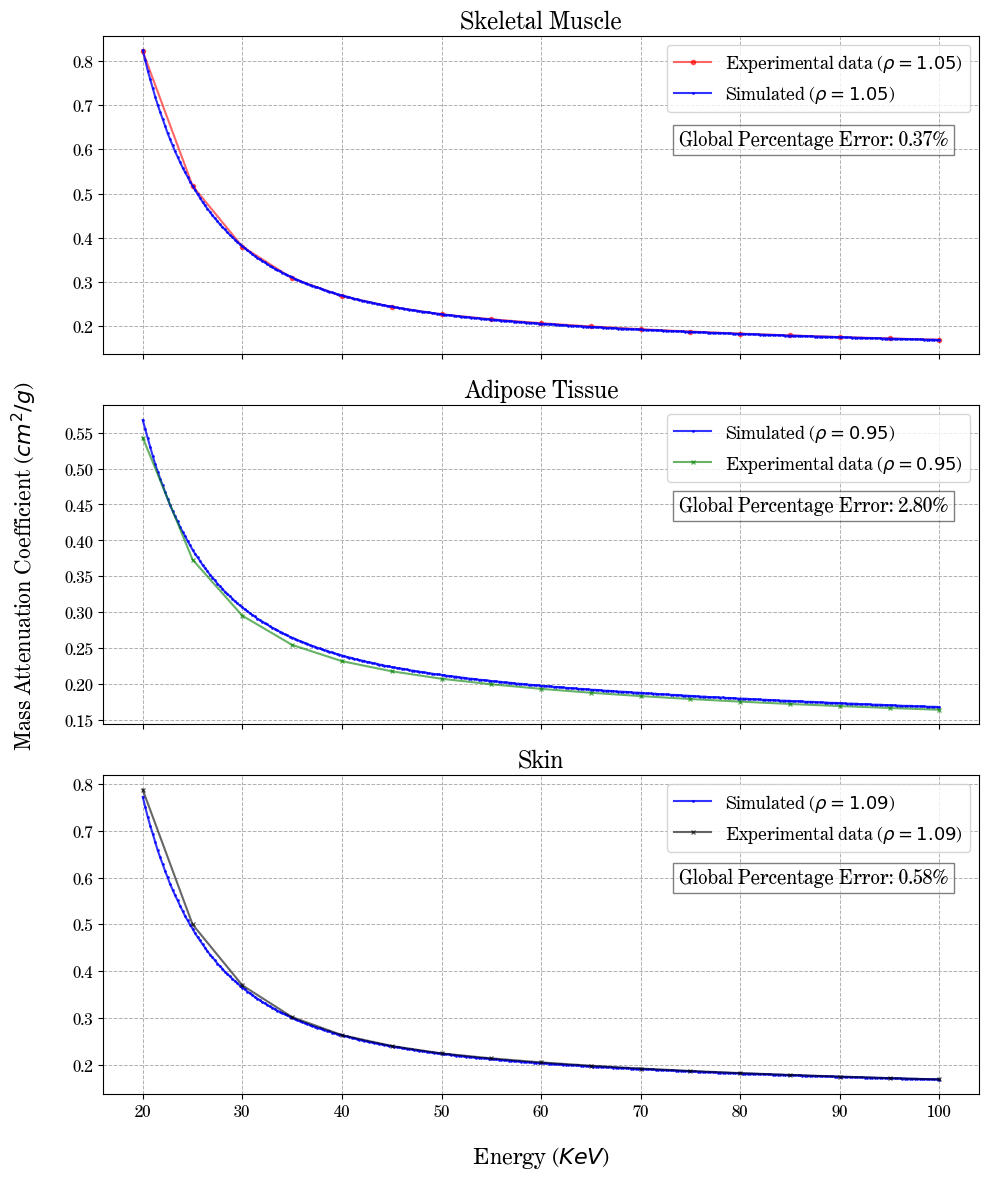

In [2]:
directory = '/Users/miguelcomett/geant4-v11.2.2/Estancia_G4/RESULTS/RADIOGRAFÍAS/MAC_data/'

csv_1 = 'Cmtt_Tissues_Small.csv'
x_branch_1 = "Energy"
y_branch_1 = 'Muscle'

csv_2 = 'Cmtt_Melbourne_AtCoeff.csv'
x_branch_2 = "Energy"
y_branch_2 = 'Skin'

title   = r"Soft Tissues"
x_label = r"Energy ($KeV$)"
y_label = r"Mass Attenuation Coefficient ($cm^2/g$)"

save_as = 'AtCoeff_SoftTissues'

Plot_3in1(directory, csv_1, csv_2, x_branch_1, y_branch_1, title, x_label, y_label, save_as)